In [22]:
import pyworld as pw
from scipy.io import wavfile
import numpy as np
import pysptk
import matplotlib.pyplot as plt
import os
from glob import glob
from dtw import dtw
from numpy.linalg import norm

In [16]:
source="rms"
target="slt"

In [32]:
source_path_list=glob(os.path.join("","train/"+source+"/*.wav"))
target_path_list=glob(os.path.join("","train/"+target+"/*.wav"))
source_fs=[]#入力のサンプリング周波数
source_data=[]#入力のデータ
target_fs=[]#出力のサンプリング周波数
target_data=[]#出力のデータ
source_raw_f0=[]#基本周波数
target_raw_f0=[]
source_t=[]
target_t=[]
source_f0=[]#修正された基本周波数
target_f0=[]
source_sp=[]#スペクトル包絡
target_sp=[]
source_ap=[]#非周期成分
target_ap=[]
source_mc=[]#MCEP
target_mc=[]
source_aligned_mc=[]#同期されたMCEP
target_aligned_mc=[]

#for i in range(len(source_path_list)):#データの読み込み
for i in range(5):
    source_fs.append(wavfile.read(source_path_list[i])[0])
    source_data.append(wavfile.read(source_path_list[i])[1])
    target_fs.append(wavfile.read(target_path_list[i])[0])
    target_data.append(wavfile.read(target_path_list[i])[1])
    source_data[i]=source_data[i].astype(np.float)
    target_data[i]=target_data[i].astype(np.float)
    
#for i in range(len(source_path_list)):#各特徴量の抽出
for i in range(5):
    source_raw_f0.append(pw.dio(source_data[i],source_fs[i])[0])
    source_t.append(pw.dio(source_data[i],source_fs[i])[1])
    source_f0.append(pw.stonemask(source_data[i],source_raw_f0[i],source_t[i],source_fs[i]))
    source_sp.append(pw.cheaptrick(source_data[i],source_f0[i],source_t[i],source_fs[i]))
    source_ap.append(pw.d4c(source_data[i],source_f0[i],source_t[i],source_fs[i]))
    source_mc.append(pysptk.sp2mc(source_sp[i],24,pysptk.util.mcepalpha(source_fs[i])))
    target_raw_f0.append(pw.dio(target_data[i],target_fs[i])[0])
    target_t.append(pw.dio(target_data[i],target_fs[i])[1])
    target_f0.append(pw.stonemask(target_data[i],target_raw_f0[i],target_t[i],target_fs[i]))
    target_sp.append(pw.cheaptrick(target_data[i],target_f0[i],target_t[i],target_fs[i]))
    target_ap.append(pw.d4c(target_data[i],target_f0[i],target_t[i],target_fs[i]))
    target_mc.append(pysptk.sp2mc(target_sp[i],24,pysptk.util.mcepalpha(target_fs[i])))
    
#for i in range(len(source_path_list)):#dtwを用いて同期化
for i in range(5):
    dist,cost,acc_cost,path=dtw(source_mc[i],target_mc[i],dist=lambda x, y: norm(x - y, ord=1))
    source_aligned_mc.append(source_mc[i][path[0]])
    target_aligned_mc.append(target_mc[i][path[1]])
    

In [26]:
dist, cost, acc_cost, path = dtw(source_mc[0],target_mc[0],dist=lambda x, y: norm(x - y, ord=1))

(-0.5, 671.5)

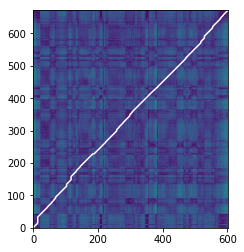

In [31]:
plt.imshow(cost.T, origin='lower', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))

In [34]:
source_aligned_mc[0].shape

(678, 25)

In [35]:
target_aligned_mc[0].shape

(678, 25)

In [36]:
source_mc[0].shape

(602, 25)

In [37]:
target_mc[0].shape

(672, 25)